# Anomaly Detection with Clustering Exercises


### Clustering - DBSCAN


### Imports

In [2]:
# imports
import numpy as np
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Remove Limits On Viewing Dataframes
pd.set_option('display.max_columns', None)

# My Files
import env

### Acquire 

In [3]:
curr_logs = pd.read_csv('curriculum_logs.csv')

In [4]:
curr_logs.head(1)

,Unnamed: 0,Unnamed: 0.1,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at
0,0,0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26


### Prepare

In [5]:
curr_logs.head(1)

,Unnamed: 0,Unnamed: 0.1,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at
0,0,0,2018-01-26,09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26


In [6]:
# concat date + time 
curr_logs['date_time']=curr_logs.date+' '+curr_logs.time

In [7]:
# change date_time to pd datetime
curr_logs.date_time = pd.to_datetime(curr_logs.date_time)

In [8]:
# change date to pd datetime
curr_logs.date = pd.to_datetime(curr_logs.date)

In [9]:
# change time to pd datetime
curr_logs.time = pd.to_datetime(curr_logs.time)

In [10]:
curr_logs.head(1)

,Unnamed: 0,Unnamed: 0.1,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time
0,0,0,2018-01-26,2022-01-27 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03


In [11]:
# set index to date_time
curr_logs = curr_logs.set_index(curr_logs.date_time)

In [12]:
# change cohort start to datetime
curr_logs.start_date = pd.to_datetime(curr_logs.start_date)

In [13]:
# change cohort end to datetime
curr_logs.end_date = pd.to_datetime(curr_logs.end_date)

In [14]:
# label students by the program they are in
program_id = [curr_logs.program_id == 1, curr_logs.program_id == 2, curr_logs.program_id == 3, curr_logs.program_id == 4]
program = ['php','java','data_science','front_end']
curr_logs['program'] = np.select(program_id, program)

In [15]:
# create column where true or false if staff
curr_logs['staff'] = curr_logs.name=='Staff'

In [16]:
# create column with date - end date
curr_logs['days_after_grad'] = curr_logs.date-curr_logs.end_date

In [17]:
curr_logs.head(1)

,Unnamed: 0,Unnamed: 0.1,date,time,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,,,,,
2018-01-26 09:55:03,0,0,2018-01-26,2022-01-27 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days


In [18]:
# Drop columns
cols_to_drop = ['Unnamed: 0', 'Unnamed: 0.1', 'date', 'time']
curr_logs = curr_logs.drop(columns=cols_to_drop)

In [19]:
curr_logs.head(1)

,path,user_id,cohort_id,program_id,ip,name,slack,start_date,end_date,created_at,updated_at,date_time,program,staff,days_after_grad
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,1,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,2018-01-26 09:55:03,php,False,720 days


#### Use DBSCAN to detect anomalies in curriculumn access.

In [20]:
page_views = curr_logs.groupby(['user_id'])['path'].agg(['count', 'nunique'])
page_views

,count,nunique
user_id,,
1,7404,976
2,1541,151
3,1562,169
4,692,143
5,1701,197
...,...,...
977,86,12
978,55,18
979,127,20


In [21]:
# create the scaler
scaler = MinMaxScaler().fit(page_views)
# use the scaler
page_views_scaled_array = scaler.transform(page_views)
page_views_scaled_array[0:10]

array([[0.41329835, 1.        ],
       [0.08597588, 0.15384615],
       [0.08714828, 0.17230769],
       [0.03857749, 0.14564103],
       [0.09490844, 0.20102564],
       [0.07855069, 0.22974359],
       [0.10060295, 0.17435897],
       [0.02690933, 0.09128205],
       [0.03260384, 0.14871795],
       [0.05141804, 0.14666667]])

In [22]:
page_views.shape

(911, 2)

In [23]:
dbsc = DBSCAN(eps = 0.1, min_samples=4).fit(page_views_scaled_array)
print(dbsc)

DBSCAN(eps=0.1, min_samples=4)


In [24]:
# add the scaled value columns back onto the dataframe
columns = list(page_views.columns)
scaled_columns = ["scaled_" + column for column in columns]
scaled_columns

['scaled_count', 'scaled_nunique']

In [25]:
# Create a dataframe containing the scaled values
scaled_df = pd.DataFrame(page_views_scaled_array, columns=scaled_columns, index=page_views.index)
scaled_df.head()

,scaled_count,scaled_nunique
user_id,,
1,0.413298,1.000000
2,0.085976,0.153846
3,0.087148,0.172308
4,0.038577,0.145641
5,0.094908,0.201026


In [26]:
page_views.head()

,count,nunique
user_id,,
1,7404,976
2,1541,151
3,1562,169
4,692,143
5,1701,197


In [27]:
# Merge the scaled and non-scaled values into one dataframe
page_views = page_views.merge(scaled_df, left_index=True, right_index=True)
page_views

,count,nunique,scaled_count,scaled_nunique
user_id,,,,
1,7404,976,0.413298,1.000000
2,1541,151,0.085976,0.153846
3,1562,169,0.087148,0.172308
4,692,143,0.038577,0.145641
5,1701,197,0.094908,0.201026
...,...,...,...,...
977,86,12,0.004745,0.011282
978,55,18,0.003015,0.017436
979,127,20,0.007034,0.019487


In [28]:
labels = dbsc.labels_

In [29]:
labels[0:15]

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0])

In [30]:
#add labels back to the dataframe
page_views['labels'] = labels

# how many unique labels (clusters) are created by DBSCAN?
page_views.labels.value_counts()

 0    906
-1      5
Name: labels, dtype: int64

In [31]:
page_views[page_views.labels==-1]

,count,nunique,scaled_count,scaled_nunique,labels
user_id,,,,,
1,7404,976,0.413298,1.000000,-1
11,17913,871,1.000000,0.892308,-1
53,12329,333,0.688254,0.340513,-1
64,16322,436,0.911177,0.446154,-1
248,5075,625,0.283274,0.640000,-1


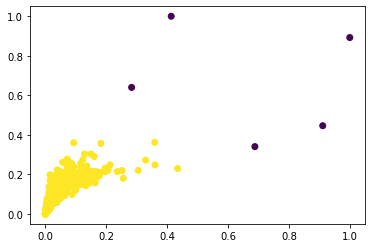

In [32]:
plt.scatter(page_views['scaled_count'], page_views['scaled_nunique'], c=page_views.labels)
plt.show()

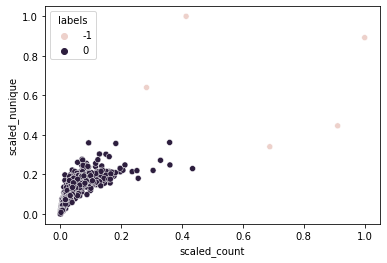

In [35]:
page_views.labels.value_counts() 
sns.scatterplot(page_views.scaled_count, page_views.scaled_nunique, hue=page_views.labels);

In [ ]:
days_after_grad

#### Same thing, different features...

#### Optional: Use DBSCAN to detect anomalies in other products from the customers dataset.



#### Optional: Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [ ]:
curr_logs

In [36]:
curr_logs.isnull().sum()

path               1
user_id            0
cohort_id          0
program_id         0
ip                 0
name               0
slack              0
start_date         0
end_date           0
created_at         0
updated_at         0
date_time          0
program            0
staff              0
days_after_grad    0
dtype: int64

In [37]:
# drop null for path column
curr_logs = curr_logs[curr_logs.path.notnull()]

In [38]:
curr_logs.isnull().sum()

path               0
user_id            0
cohort_id          0
program_id         0
ip                 0
name               0
slack              0
start_date         0
end_date           0
created_at         0
updated_at         0
date_time          0
program            0
staff              0
days_after_grad    0
dtype: int64